<a href="https://colab.research.google.com/github/akshaya-nagarajan/MachineLearning/blob/master/MLMidTermAkshayaNagarajan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Objective function: To analyze the German Data , for getting an idea of which factors are influencing/affecting the credit risk status and are basically responsible for Good or Bad Credit status.

### Mounting the drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
germanDataFilePath = base_dir + '/german.data'

### Importing all the libraries used in this file

In [0]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, mean_squared_error, f1_score

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 5]

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv(germanDataFilePath, delim_whitespace = True, header = None)

In [0]:
df.shape

(1000, 21)

In [0]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2


In [0]:
columns = ['checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount',
            'saving_account', 'present_emp_since', 'inst_rate', 'personal_status',
            'other_debtors', 'residence_since', 'property', 'age', 'inst_plans',
            'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'status']

### Assigning column names

In [0]:
df.columns = columns

In [0]:
df.head(2)

,checking_account,duration,credit_history,purpose,credit_amount,saving_account,present_emp_since,inst_rate,personal_status,other_debtors,residence_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2


### Categorical columns

In [0]:
cat_columns = ['checking_account', 'credit_history', 'purpose', 
               'saving_account', 'present_emp_since', 'personal_status',
                'other_debtors', 'property', 'inst_plans',
                'housing', 'job', 'telephone', 'foreign_worker']

### Checking null values in data frame

In [0]:
df.isnull().values.any()

False

### Getting Unique values in categorical columns

In [0]:
for i in cat_columns:
  print('In %s column, Unique values are %s' % (i, df[i].unique()))

In checking_account column, Unique values are ['A11' 'A12' 'A14' 'A13']
In credit_history column, Unique values are ['A34' 'A32' 'A33' 'A30' 'A31']
In purpose column, Unique values are ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
In saving_account column, Unique values are ['A65' 'A61' 'A63' 'A64' 'A62']
In present_emp_since column, Unique values are ['A75' 'A73' 'A74' 'A71' 'A72']
In personal_status column, Unique values are ['A93' 'A92' 'A91' 'A94']
In other_debtors column, Unique values are ['A101' 'A103' 'A102']
In property column, Unique values are ['A121' 'A122' 'A124' 'A123']
In inst_plans column, Unique values are ['A143' 'A141' 'A142']
In housing column, Unique values are ['A152' 'A153' 'A151']
In job column, Unique values are ['A173' 'A172' 'A174' 'A171']
In telephone column, Unique values are ['A192' 'A191']
In foreign_worker column, Unique values are ['A201' 'A202']


### Converting Categorical values to numerical values

**Dictionary d is used here, to hold the encoded and unique values mapping**

In [0]:
d = {}
for cat in cat_columns:
  c = df[cat].astype('category')
  d[cat] = dict(enumerate(c.cat.categories))
  df[cat] = c.cat.codes

### Dividing the credit amount values by 100 and getting ceil value

In [0]:
df['credit_amount'] = df['credit_amount'].div(100)

In [0]:
df['credit_amount'] = df['credit_amount'].apply(np.ceil).astype(int)

In [0]:
df.head(2)

,checking_account,duration,credit_history,purpose,credit_amount,saving_account,present_emp_since,inst_rate,personal_status,other_debtors,residence_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,0,6,4,4,12,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,60,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0,2


### Data Visualization

#### Count Plot

In [0]:
df['status'].value_counts()

1    700
2    300
Name: status, dtype: int64

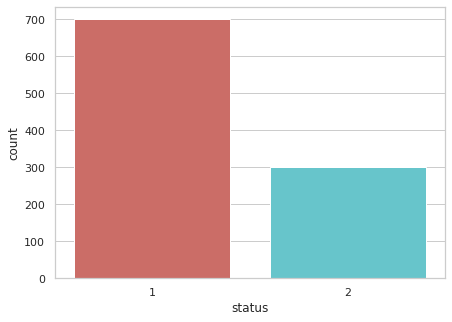

In [0]:
sns.countplot(x = 'status', data = df, palette='hls')
plt.show()

**According to the above plot, the number of samples in Good and Bad classes are imbalanced.**

In [0]:
d['foreign_worker']

{0: 'A201', 1: 'A202'}

In [0]:
df['foreign_worker'].value_counts()

0    963
1     37
Name: foreign_worker, dtype: int64

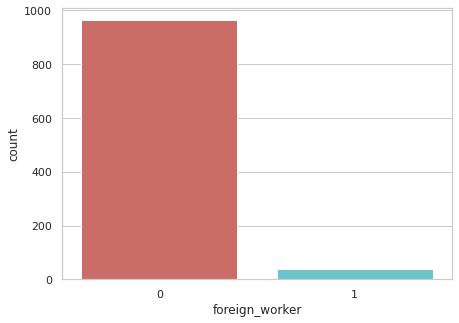

In [0]:
sns.countplot(x = 'foreign_worker', data = df, palette='hls')
plt.show()

**From the plot above, Most of the samples are foreign workers**

In [0]:
d['telephone']

{0: 'A191', 1: 'A192'}

In [0]:
df['telephone'].value_counts()

0    596
1    404
Name: telephone, dtype: int64

In [0]:
d['personal_status']

{0: 'A91', 1: 'A92', 2: 'A93', 3: 'A94'}

In [0]:
df['personal_status'].value_counts()

2    548
1    310
3     92
0     50
Name: personal_status, dtype: int64

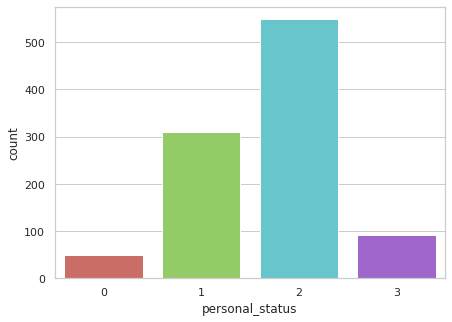

In [0]:
sns.countplot(x = 'personal_status', data = df, palette='hls')
plt.show()

**From the plot above, Number of male signles are high, Divorced/married/seperated Females are second high**

In [0]:
d['purpose']

{0: 'A40',
 1: 'A41',
 2: 'A410',
 3: 'A42',
 4: 'A43',
 5: 'A44',
 6: 'A45',
 7: 'A46',
 8: 'A48',
 9: 'A49'}

In [0]:
df['purpose'].value_counts()

4    280
0    234
3    181
1    103
9     97
7     50
6     22
5     12
2     12
8      9
Name: purpose, dtype: int64

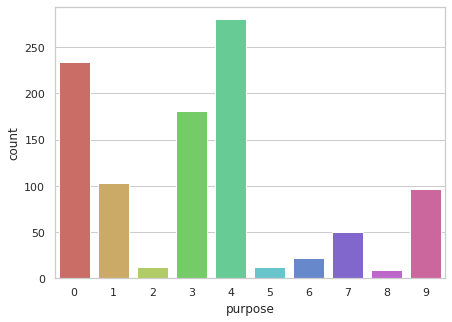

In [0]:
sns.countplot(x = 'purpose', data = df, palette='hls')
plt.show()

**Purpose of using the credit taken from bank was mostly for tv and radio, for car.**

#### Histogram

**Age group of 25 to 30 is having more frequency = more number of people between these 2 groups.**

Text(0, 0.5, 'Frequency')

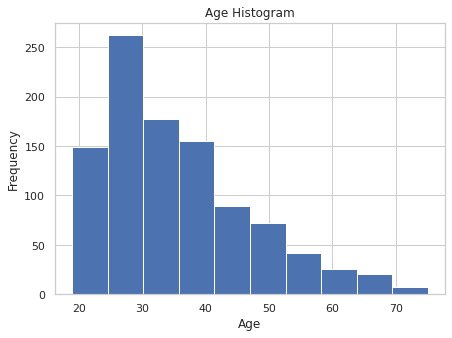

In [0]:
df.age.hist()
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')

#### Heatmap correlation plot

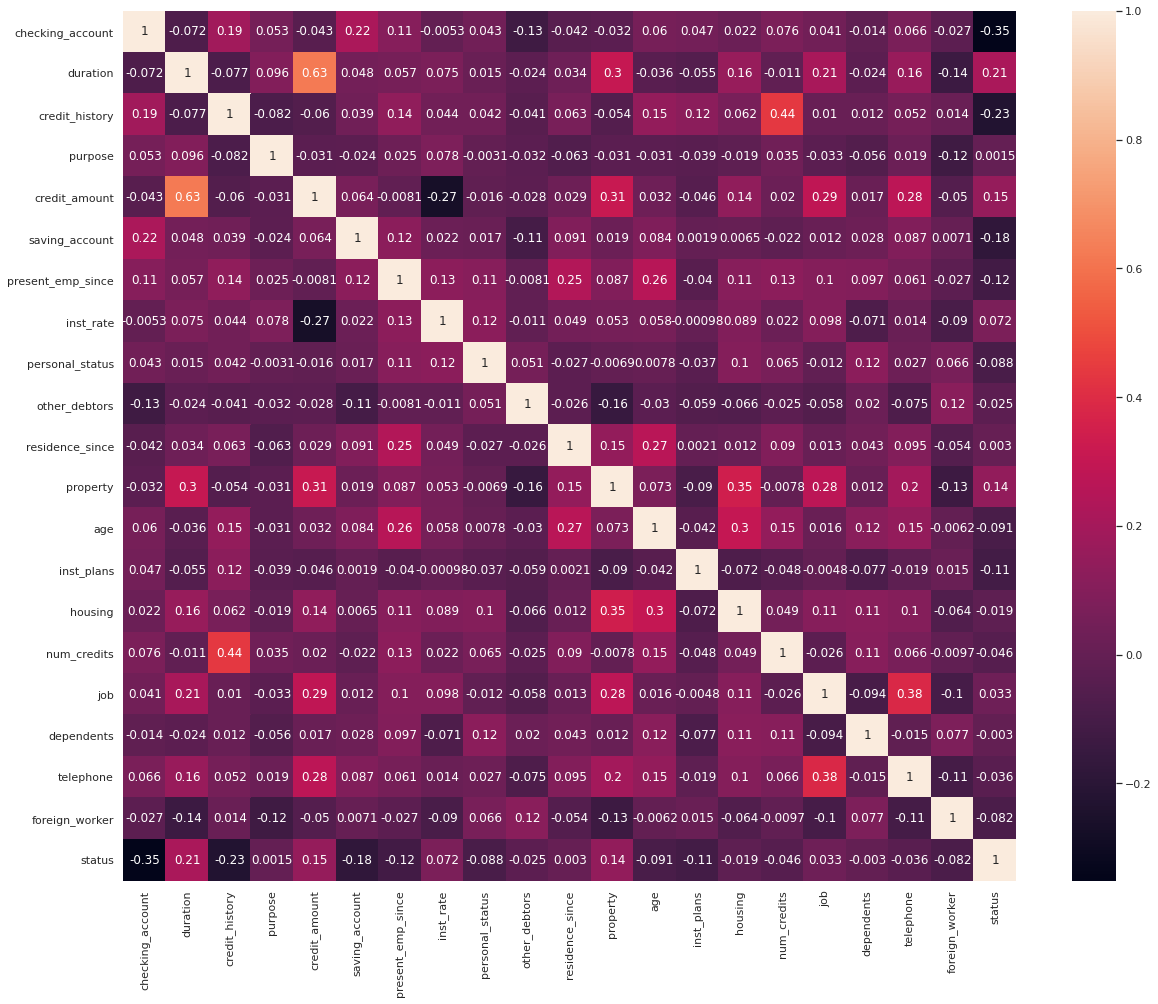

In [0]:
plt.figure(figsize=(20, 16))
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrMatrix, annot=True)

From the correlation plot above, tha features like 

---


1. duration and purpose
2. credit_history and num_credits
3. credit_amount and duration  

---


are highly correlated.(Many such features can be mapped.)

#### Plotting Jobs based on it's categories

**Mapping Encoded label and tha actual values from the dictionary**

In [0]:
d['job']

{0: 'A171', 1: 'A172', 2: 'A173', 3: 'A174'}

Text(3, -100, 'Self-employed/Highly Skilled')

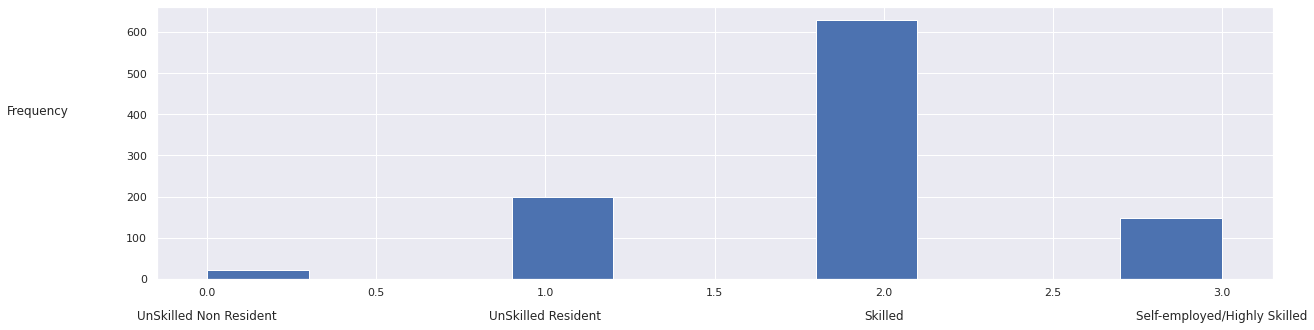

In [0]:
plt.figure(figsize=(20,5))
fig = df["job"].hist()
fig.text(-0.5, 400, 'Frequency', ha='center')
fig.text(0, -100, 'UnSkilled Non Resident', ha='center')
fig.text(1, -100, 'UnSkilled Resident', ha='center')
fig.text(2, -100, 'Skilled', ha='center')
fig.text(3, -100, 'Self-employed/Highly Skilled', ha='center')

**From the plot above, the Skilled People are comparitively more in credit dataset**

### Elbow Method

In [0]:
def elbow_method():
    Error =[]
    x = df.iloc[:, 0:20].values
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i).fit(x)
        kmeans.fit(x)
        Error.append(kmeans.inertia_)
    plt.figure(figsize=(5,5))
    plt.plot(range(1, 11), Error)
    plt.title('Elbow method')
    plt.xlabel('No of clusters')
    plt.ylabel('Error')
    plt.show()

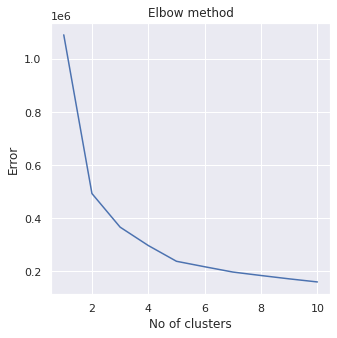

In [0]:
elbow_method()

**From the above plot, when the number of clusters is 4, error is comparitively low than when the clusters are 2 and 3.**

### Silhouette score

In [0]:
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df.iloc[:, 0:20].values)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df.iloc[:, 0:20].values, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5746490350596823)
For n_clusters = 3, silhouette score is 0.44612656032321263)
For n_clusters = 4, silhouette score is 0.30862115740632373)
For n_clusters = 5, silhouette score is 0.32106951421149665)
For n_clusters = 6, silhouette score is 0.302955092557776)
For n_clusters = 7, silhouette score is 0.2843718868866106)
For n_clusters = 8, silhouette score is 0.25738822172653353)
For n_clusters = 9, silhouette score is 0.2475522281397712)


**From the above score list, when the number of clusters is 4, error is comparitively low than when the clusters are 2 and 3. When the cluster are 5 in number, the silhoutte score slightly increases. Thus, considering number of clusters as 4.**

### GMM Clustering

In [0]:
x = df.iloc[:, 0:20].values
gmm = GaussianMixture(n_components = 4 , covariance_type='spherical').fit(x)
y_gmm = gmm.predict(df.iloc[:, 0:20].values)
#df['GMMCluster'] = y_gmm
df.tail()

,checking_account,duration,credit_history,purpose,credit_amount,saving_account,present_emp_since,inst_rate,personal_status,other_debtors,residence_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
995,3,12,2,3,18,0,3,3,1,0,4,0,31,2,1,1,1,1,0,0,1
996,0,30,2,1,39,0,2,4,0,0,4,1,40,2,1,1,3,1,1,0,1
997,3,12,2,4,9,0,4,4,2,0,4,2,38,2,1,1,2,1,0,0,1
998,0,45,2,4,19,0,2,4,2,0,4,3,23,2,2,1,2,1,1,0,2
999,1,45,4,1,46,1,0,3,2,0,4,2,27,2,1,1,2,1,0,0,1


### Plotting GMM Clusters

In [0]:
def plot_gmm(i, j):
  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111)
  plt.scatter(x[:, j], x[:, j], y_gmm, c=y_gmm)
  plt.scatter(x[y_gmm == 0, i], x[y_gmm == 0, j], s = 50, c = 'red')
  plt.scatter(x[y_gmm == 1, i], x[y_gmm == 1, j], s = 50, c = 'blue')
  plt.scatter(x[y_gmm == 2, i], x[y_gmm == 2, j], s = 50, c = 'green')
  plt.scatter(x[y_gmm == 3, i], x[y_gmm == 3, j], s = 50, c = 'yellow')
  plt.xlabel(df.columns[i])
  plt.ylabel(df.columns[j])
  plt.show()

From the below clustered plot, (Credit amount and age plot), following info can be inferred:
1. Samples between the age groups: 20 -50, credit_amount: < 5000 are comparitively more in number.
2. Clusetered based on the credit_amount groups - < 2500, <5000, < 10000, < 15000 - 4 clusters
3. Number of samples above age 70 is very low.


---
From the below clustered plot, (Credit amount and duration), following info can be inferred:
1. Duration is mostly less than 50 months.
2. When the credit amount is less, the duration months is also less in value. Both seems to be directly proportional.

---





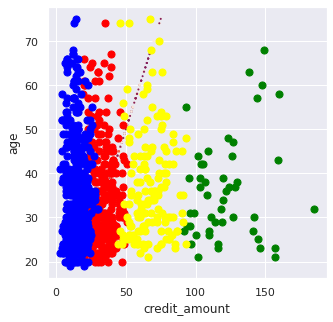

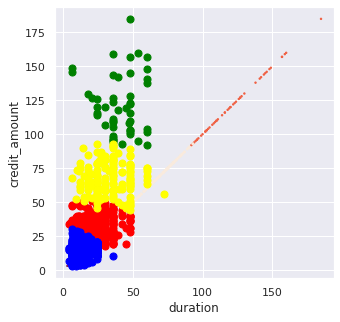

In [0]:
plot_gmm(4, 12)
# plot_gmm(12, 1)
plot_gmm(1, 4)

### K-Means Clustering

In [0]:
x = df.iloc[:, 0:20].values
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(x)
#df['KMeansCluster'] = y_kmeans
df.tail()

,checking_account,duration,credit_history,purpose,credit_amount,saving_account,present_emp_since,inst_rate,personal_status,other_debtors,residence_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
995,3,12,2,3,18,0,3,3,1,0,4,0,31,2,1,1,1,1,0,0,1
996,0,30,2,1,39,0,2,4,0,0,4,1,40,2,1,1,3,1,1,0,1
997,3,12,2,4,9,0,4,4,2,0,4,2,38,2,1,1,2,1,0,0,1
998,0,45,2,4,19,0,2,4,2,0,4,3,23,2,2,1,2,1,1,0,2
999,1,45,4,1,46,1,0,3,2,0,4,2,27,2,1,1,2,1,0,0,1


In [0]:
df.sample(5, random_state=5)

,checking_account,duration,credit_history,purpose,credit_amount,saving_account,present_emp_since,inst_rate,personal_status,other_debtors,residence_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
544,3,12,4,0,13,0,4,4,2,0,4,0,61,2,1,2,1,1,0,0,1
515,0,6,4,0,7,0,3,4,1,0,3,1,37,2,1,2,2,1,0,1,1
193,3,6,2,4,22,0,3,2,3,0,2,0,29,2,0,1,2,1,0,0,1
11,0,48,2,9,44,0,1,3,1,0,4,1,24,2,0,1,2,1,0,0,2
279,3,24,2,4,20,1,2,4,2,0,4,2,29,2,0,1,3,1,1,0,1


### Plotting K-Means Clusters

In [0]:
def plot_kmeans(i, j):
  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111)
  plt.scatter(x[:, i], x[:, j], y_kmeans, c=y_kmeans)
  plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 50, c = 'red')
  plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 50, c = 'blue')
  plt.scatter(x[y_kmeans == 2, i], x[y_kmeans == 2, j], s = 50, c = 'green')
  plt.scatter(x[y_kmeans == 3, i], x[y_kmeans == 3, j], s = 50, c = 'yellow')
  plt.xlabel(df.columns[i])
  plt.ylabel(df.columns[j])
  plt.show()

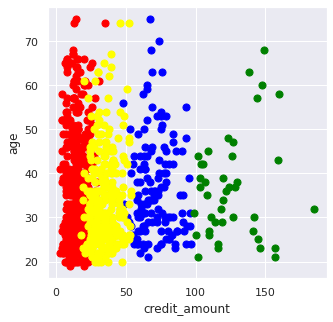

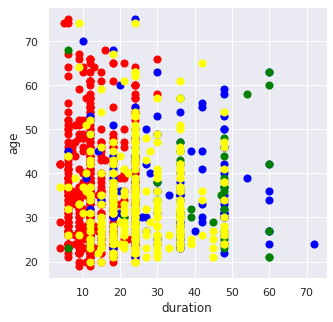

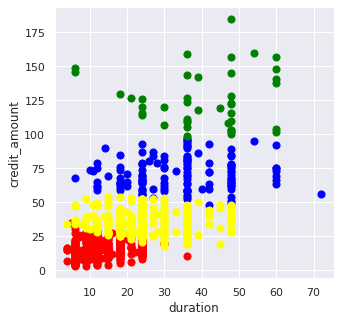

In [0]:
plot_kmeans(4, 12)
plot_kmeans(1, 12)
plot_kmeans(1, 4)

From the above clustered plot, (Credit amount and age plot), following info can be inferred:
1. Samples between the age groups: 20 -50, credit_amount: < 5000 are comparitively more in number.
2. Clusetered based on the credit_amount groups - < 2500, <5000, < 10000, < 15000 - 4 clusters
3. Number of samples above age 70 is very low.

---
From the above clustered plot, (Credit amount and duration), following info can be inferred:
1. Duration is mostly less than 50 months.
2. When the credit amount is less, the duration months is also less in value. Both seems to be directlyproportional.


---
From the above clustered plot, (age and duration), following info can be inferred:
1. When the sample is between the age 20- 40, the duration is less in months.

---





In [0]:
df.shape

(1000, 21)

### Train - Test Split 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, (df.columns != 'status')], df.status, test_size=0.3)

In [0]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (700, 20)
y_train shape (700,)
x_test shape (300, 20)
y_test shape (300,)


### Logistic Regression

In [0]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(x_test)
accuracy = logreg.score(x_test, y_test)*100
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy))

Accuracy of logistic regression classifier on test set: 78.67


In [0]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[192  22]
 [ 42  44]]


**True postives + True Negatives = 183+52, False Positives + False Negatives = 46 + 19**

#### Confusion Matrix

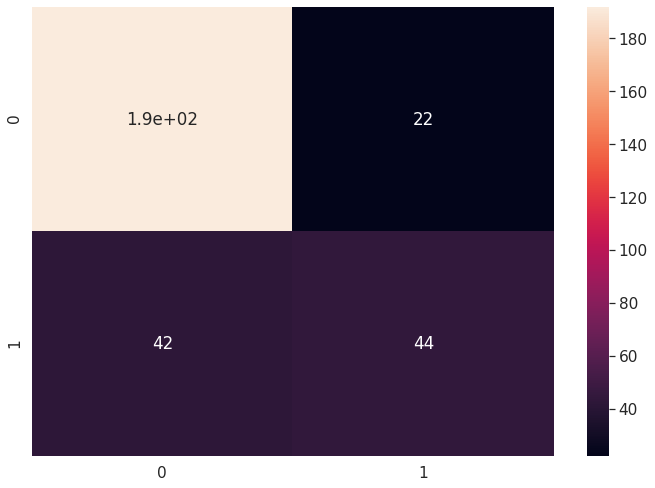

<Figure size 360x360 with 0 Axes>

In [0]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True)
plt.figure(figsize=(5,5))
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86       214
           2       0.67      0.51      0.58        86

    accuracy                           0.79       300
   macro avg       0.74      0.70      0.72       300
weighted avg       0.78      0.79      0.78       300



In [0]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8205128205128205
Recall: 0.897196261682243


#### Metrics

In [0]:
val = {'Model': ['Logistic Regression'], 'Accuracy': [accuracy], 'Precision': [metrics.precision_score(y_test, y_pred)*100.0], 'Recall': metrics.recall_score(y_test, y_pred) * 100.0, 'F1-Score': metrics.f1_score(y_test, y_pred) * 100.0}
metrics_df_log = pd.DataFrame(val, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
metrics_df_log.head()

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,78.666667,82.051282,89.719626,85.714286


In [0]:
y_test_boolean = 2 == y_test

In [0]:
y_test_boolean

273     True
867    False
403    False
615    False
736     True
       ...  
639     True
471     True
945    False
910    False
939    False
Name: status, Length: 300, dtype: bool

#### Plotting ROC Curve

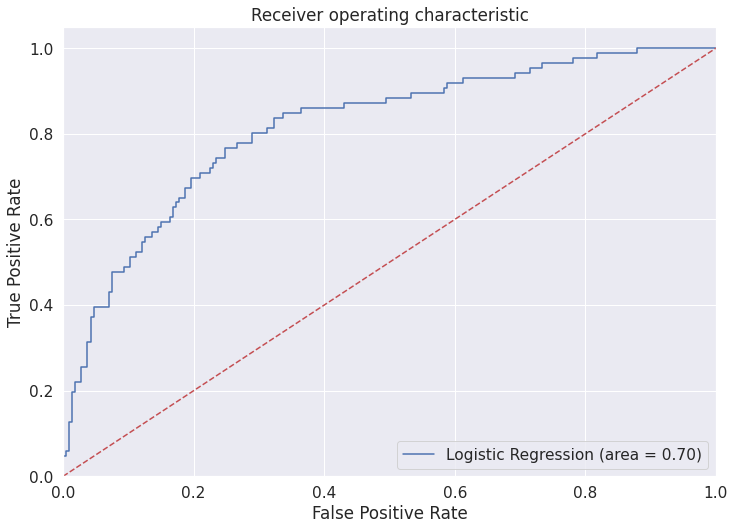

In [0]:
logit_roc_auc = roc_auc_score(y_test_boolean, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test_boolean, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Multiple Linear Regression

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, (df.columns != 'status')], df.status, test_size=0.3)

In [0]:
x_train.shape

(700, 20)

In [0]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# intercept:
print(regressor.intercept_)

# slopes:
print(regressor.coef_)

1.680705150794403
[-0.09547555  0.00476996 -0.05694935 -0.00834545  0.0013872  -0.0389648
 -0.03280276  0.03836973 -0.05562204 -0.07149874  0.01277481  0.02923405
 -0.00134289 -0.05918196 -0.07327415  0.03291912  0.01038408 -0.00172502
 -0.05989483 -0.02183881]


In [0]:
y_pred = regressor.predict(x_test)

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.33395722276953754
Mean Squared Error: 0.16736220464257898
Root Mean Squared Error: 0.40909926013448006


#### Metrics

In [0]:
val = {'Model': ['Mulitple Linear Regression'], 'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred)* 100, 'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred) * 100.0, 'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))}
metrics_df_mlr = pd.DataFrame(val, columns=['Model', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])
result = pd.concat([metrics_df_log, metrics_df_mlr], ignore_index=True, sort=False)
result = result.replace(np.nan, '-')
result.head(10)

,Model,Accuracy,Precision,Recall,F1-Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Logistic Regression,78.6667,82.0513,89.7196,85.7143,-,-,-
1,Mulitple Linear Regression,-,-,-,-,33.3957,16.7362,0.409099


### XGBoost Regression

#### Convert the dataset into an optimized data structure called Dmatrix

In [0]:
x = df.iloc[:,: -1]
y = df.iloc[:, -1]
dmatrix = xgb.DMatrix(data=x, label=y)

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.30, max_depth = 3, alpha = 10, n_estimators = 10, min_child_weight = 1)

In [0]:
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[04:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.411594


HyperParamters can be in the below ranges

{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [0]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.30, 'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain = dmatrix, params = params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[04:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.727301,0.006869,0.727142,0.019606
1,0.601116,0.004246,0.601528,0.015910
2,0.527760,0.001713,0.529758,0.015381
3,0.484519,0.001741,0.487839,0.014866
4,0.459534,0.002339,0.463855,0.013628


In [0]:
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=10)

[04:38:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
# xgb.plot_tree(xg_reg,num_trees=0)
# plt.show()

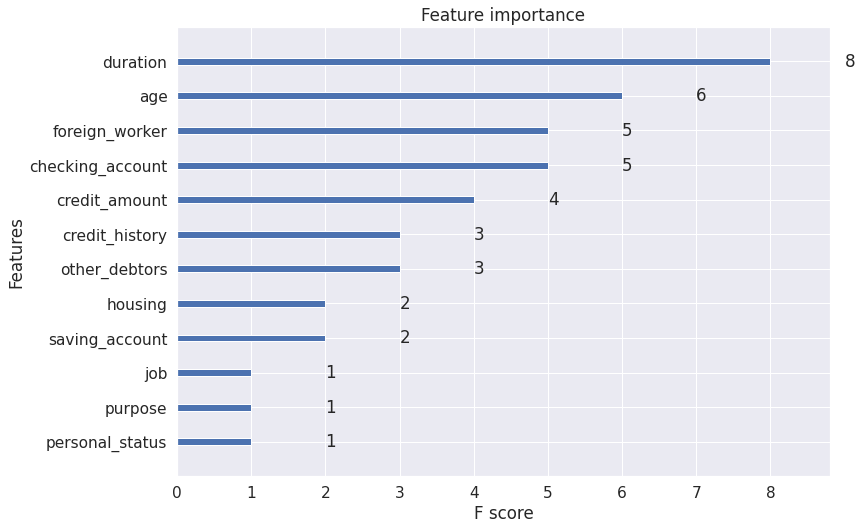

In [0]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [7, 7]
plt.show()

### XGBoost Classifier

In [0]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [0]:
accuracy = accuracy_score(y_test, predictions)* 100.0
print("Accuracy: %.2f%%" % (accuracy ))

Accuracy: 76.00%


#### Metrics

In [0]:
val = {'Model': ['XGBoost Calssifier'], 'Accuracy': [accuracy], 'Precision': [metrics.precision_score(y_test, y_pred)*100.0], 'Recall': metrics.recall_score(y_test, y_pred) * 100.0, 'F1-Score': metrics.f1_score(y_test, y_pred) * 100.0}
metrics_df_xgb = pd.DataFrame(val, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
result = pd.concat([result, metrics_df_xgb], ignore_index=True, sort=False)
result = result.replace(np.nan, '-')
result.head()

,Model,Accuracy,Precision,Recall,F1-Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Logistic Regression,78.6667,82.0513,89.7196,85.7143,-,-,-
1,Mulitple Linear Regression,-,-,-,-,33.3957,16.7362,0.409099
2,XGBoost Calssifier,76,78.5714,89.9038,83.8565,-,-,-


### Random Forest Classifier

In [0]:
model = RandomForestClassifier(n_estimators=100, random_state=50, max_features = 'sqrt', n_jobs=-1, verbose = 1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [0]:
feature_imp = pd.Series(model.feature_importances_,index=['checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount',
            'saving_account', 'present_emp_since', 'inst_rate', 'personal_status',
            'other_debtors', 'residence_since', 'property', 'age', 'inst_plans',
            'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker']).sort_values(ascending=False)
feature_imp

credit_amount        0.126708
checking_account     0.109180
age                  0.105073
duration             0.094086
purpose              0.068223
credit_history       0.059226
present_emp_since    0.053272
saving_account       0.047751
property             0.046519
residence_since      0.040380
inst_rate            0.039518
personal_status      0.038802
job                  0.034244
inst_plans           0.031281
housing              0.028690
num_credits          0.023859
telephone            0.021022
other_debtors        0.017890
dependents           0.011671
foreign_worker       0.002605
dtype: float64

No handles with labels found to put in legend.


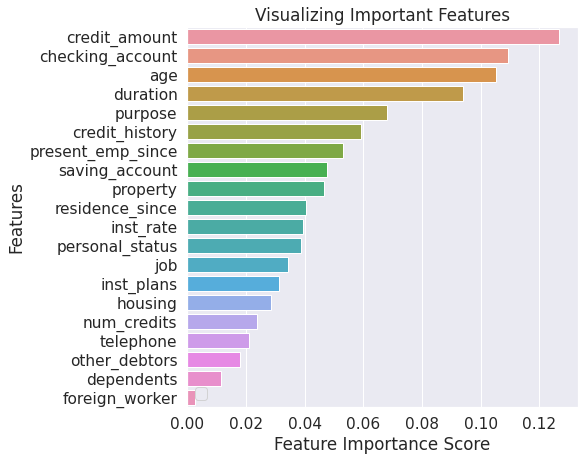

In [0]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.rcParams['figure.figsize'] = [15, 7]
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [0]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 287
Average maximum depth 16


In [0]:
train_rf_predictions = model.predict(x_train)
train_rf_probs = model.predict_proba(x_train)[:, 1]

rf_predictions = model.predict(x_test)
rf_probs = model.predict_proba(x_test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [0]:
print(confusion_matrix(y_test.round(),y_pred.round()))
accuracy = accuracy_score(y_test.round(), y_pred.round()) * 100.0
print(accuracy)

[[191  17]
 [ 55  37]]
76.0


**True postives + True Negatives = 201+30, False Positives + False Negatives = 56 + 13**

#### Metrics

In [0]:
val = {'Model': ['Random Forest Calssifier'], 'Accuracy': [accuracy], 'Precision': [metrics.precision_score(y_test, y_pred)*100.0], 'Recall': metrics.recall_score(y_test, y_pred) * 100.0, 'F1-Score': metrics.f1_score(y_test, y_pred) * 100.0}
metrics_df_rfc = pd.DataFrame(val, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
result = pd.concat([result, metrics_df_rfc], ignore_index=True, sort=False)
result.head()

,Model,Accuracy,Precision,Recall,F1-Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Logistic Regression,78.6667,82.0513,89.7196,85.7143,-,-,-
1,Mulitple Linear Regression,-,-,-,-,33.3957,16.7362,0.409099
2,XGBoost Calssifier,76,78.5714,89.9038,83.8565,-,-,-
3,Random Forest Calssifier,76,77.6423,91.8269,84.141,NaN,NaN,NaN


#### Confusion Matrix

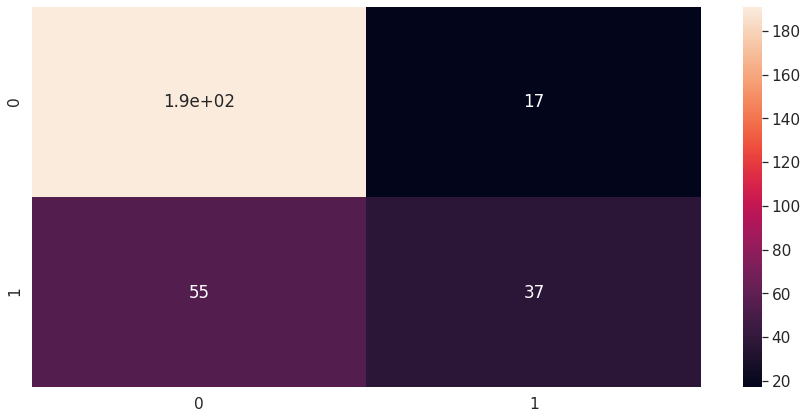

<Figure size 360x360 with 0 Axes>

In [0]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.figure(figsize=(5,5))
plt.show()

### SVM

In [0]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [0]:
accuracy = metrics.accuracy_score(y_test, y_pred) * 100.0
print("Accuracy:", accuracy)

Accuracy: 74.66666666666667


#### Metrics

In [0]:
val = {'Model': ['SVM'], 'Accuracy': [accuracy], 'Precision': [metrics.precision_score(y_test, y_pred)*100.0], 'Recall': metrics.recall_score(y_test, y_pred) * 100.0, 'F1-Score': metrics.f1_score(y_test, y_pred) * 100.0}
metrics_df_svm = pd.DataFrame(val, columns=['Model', 'Accuracy', 'Precision', 'Recall','F1-Score'])
result = pd.concat([result, metrics_df_svm], ignore_index=True, sort=False)
result = result.replace(np.nan, '-')
result.head()

,Model,Accuracy,Precision,Recall,F1-Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Logistic Regression,78.6667,82.0513,89.7196,85.7143,-,-,-
1,Mulitple Linear Regression,-,-,-,-,33.3957,16.7362,0.409099
2,XGBoost Calssifier,76,78.5714,89.9038,83.8565,-,-,-
3,Random Forest Calssifier,76,77.6423,91.8269,84.141,-,-,-
4,SVM,74.6667,77.7311,88.9423,82.9596,-,-,-


In [0]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.7773109243697479
Recall: 0.8894230769230769


In [0]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[185  23]
 [ 53  39]]
              precision    recall  f1-score   support

           1       0.78      0.89      0.83       208
           2       0.63      0.42      0.51        92

    accuracy                           0.75       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.73      0.75      0.73       300



**True postives + True Negatives = 192 + 45, False Positives + False Negatives = 41 + 22**

#### Confusion Matrix

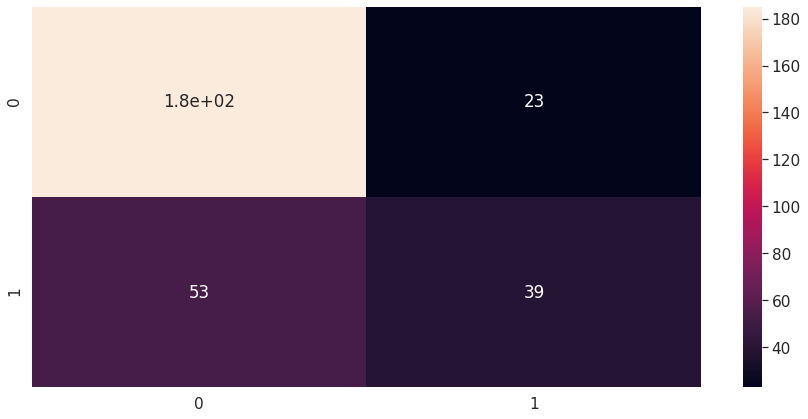

<Figure size 360x360 with 0 Axes>

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.figure(figsize=(5,5))
plt.show()

### KNN

In [0]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [0]:
scores

{1: 0.6366666666666667,
 2: 0.6766666666666666,
 3: 0.6633333333333333,
 4: 0.6733333333333333,
 5: 0.6666666666666666,
 6: 0.68,
 7: 0.6933333333333334,
 8: 0.6933333333333334,
 9: 0.71,
 10: 0.71,
 11: 0.71,
 12: 0.7,
 13: 0.7066666666666667,
 14: 0.7066666666666667,
 15: 0.7166666666666667,
 16: 0.71,
 17: 0.6966666666666667,
 18: 0.7033333333333334,
 19: 0.7133333333333334,
 20: 0.7133333333333334,
 21: 0.7166666666666667,
 22: 0.7033333333333334,
 23: 0.72,
 24: 0.7133333333333334,
 25: 0.7066666666666667}

Text(0, 0.5, 'Testing Accuracy')

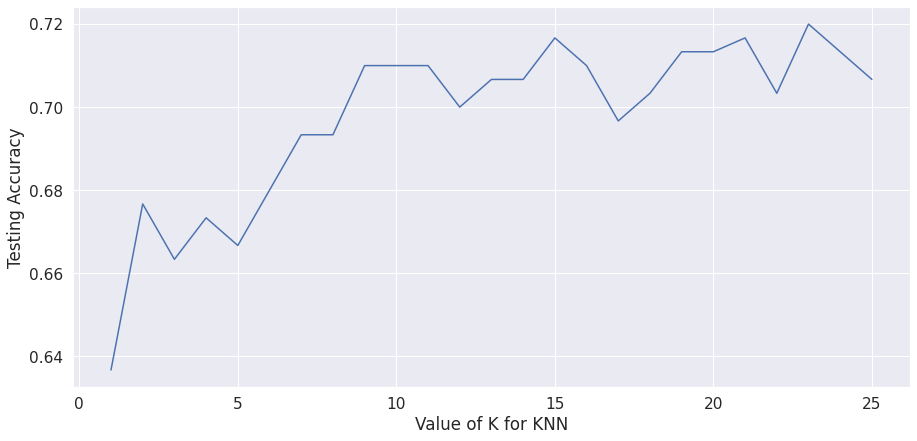

In [0]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

**The testing accuracy is almost non changing when the K values is 4 to 6. Thus, choosing k = 5 for implementation below.**

In [0]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [0]:
y_pred = model.predict(x_test)

In [0]:
accuracy = metrics.accuracy_score(y_test, y_pred) * 100.0
print("Accuracy:",accuracy)

Accuracy: 74.66666666666667


#### Metrics

In [0]:
val = {'Model': ['KNN'], 'Accuracy': [accuracy], 'Precision': [metrics.precision_score(y_test, y_pred)*100.0], 'Recall': metrics.recall_score(y_test, y_pred) * 100.0, 'F1-Score': metrics.f1_score(y_test, y_pred) * 100.0}
metrics_df_knn = pd.DataFrame(val, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
result = pd.concat([result, metrics_df_knn], ignore_index=True, sort=False)
result = result.replace(np.nan, '-')
result.head()

,Model,Accuracy,Precision,Recall,F1-Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Logistic Regression,78.6667,82.0513,89.7196,85.7143,-,-,-
1,Mulitple Linear Regression,-,-,-,-,33.3957,16.7362,0.409099
2,XGBoost Calssifier,76,78.5714,89.9038,83.8565,-,-,-
3,Random Forest Calssifier,76,77.6423,91.8269,84.141,-,-,-
4,SVM,74.6667,77.7311,88.9423,82.9596,-,-,-


In [0]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.7773109243697479
Recall: 0.8894230769230769


In [0]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[185  23]
 [ 53  39]]
              precision    recall  f1-score   support

           1       0.78      0.89      0.83       208
           2       0.63      0.42      0.51        92

    accuracy                           0.75       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.73      0.75      0.73       300



**True postives + True Negatives = 192+45, False Positives + False Negatives = 41 + 22**

#### Confusion Matrix

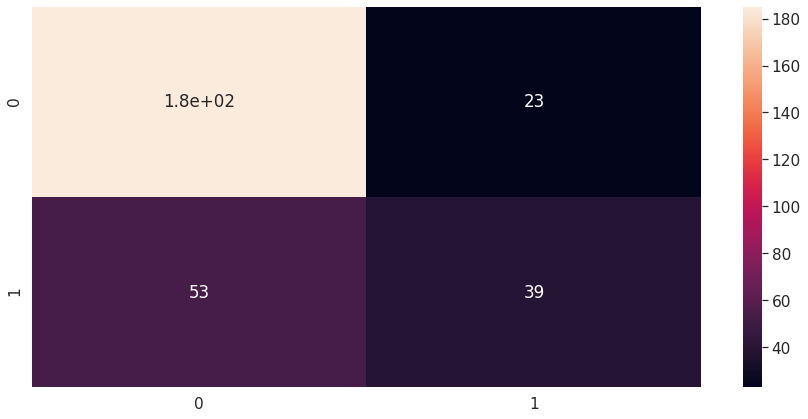

<Figure size 360x360 with 0 Axes>

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.figure(figsize=(5,5))
plt.show()

### PCA

In [0]:
x = df.iloc[:,0:20].values
y = df.iloc[:,20].values
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#x = StandardScaler().fit_transform(x)

In [0]:
pca = PCA(n_components=2)

In [0]:
principalComponents = pca.fit_transform(x)

In [0]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [0]:
finalDf = pd.concat([principalDf, df[['status']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,status
0,-24.214485,32.716355,1
1,33.231193,-16.706245,2
2,-14.109902,14.213712,1
3,50.015488,7.639833,1
4,16.246166,17.338678,2


In [0]:
X_std = df.iloc[:,0:20].values
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]    
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,10)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,10)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ]))

fig = dict(data=data, layout=layout)


# these two lines allow your code to show up in a notebook - without these 2 lines, the below graph can't be displayed
import plotly.offline as pl
from plotly.offline import init_notebook_mode, iplot

pl.iplot(fig, filename='selecting-principal-components') 

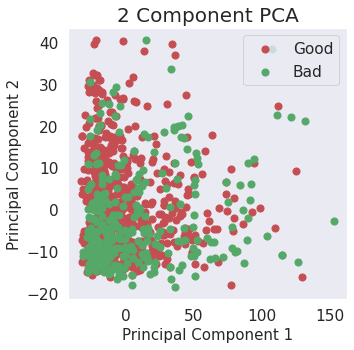

In [0]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [1, 2]

colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Good','Bad'])
ax.grid()

**The classes - Good and Bad are somewhat distinguishable, according to the above plot.**

In [0]:
pca.explained_variance_ratio_

array([0.78780196, 0.11987135])

### NaiveBayes

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = model.predict(x_test)

In [0]:
accuracy = metrics.accuracy_score(y_test, y_pred) * 100.0
print("Accuracy:", accuracy)

Accuracy: 74.0


#### Metrics

In [0]:
val = {'Model': ['NaiveBayes'], 'Accuracy': [accuracy], 'Precision': [metrics.precision_score(y_test, y_pred)*100.0], 'Recall': metrics.recall_score(y_test, y_pred) * 100.0, 'F1-Score': metrics.f1_score(y_test, y_pred) * 100.0}
metrics_df_nb = pd.DataFrame(val, columns=['Model', 'Accuracy', 'Precision', 'Recall','F1-Score'])
result = pd.concat([result, metrics_df_nb], ignore_index=True, sort=False)
result = result.replace(np.nan, '-')
result.head(10)

,Model,Accuracy,Precision,Recall,F1-Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Logistic Regression,78.6667,82.0513,89.7196,85.7143,-,-,-
1,Mulitple Linear Regression,-,-,-,-,33.3957,16.7362,0.409099
2,XGBoost Calssifier,76,78.5714,89.9038,83.8565,-,-,-
3,Random Forest Calssifier,76,77.6423,91.8269,84.141,-,-,-
4,SVM,74.6667,77.7311,88.9423,82.9596,-,-,-
5,KNN,74.6667,77.7311,88.9423,82.9596,-,-,-
6,NaiveBayes,74,81.5534,80.7692,81.1594,-,-,-


In [0]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8155339805825242
Recall: 0.8076923076923077


In [0]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[168  40]
 [ 38  54]]
              precision    recall  f1-score   support

           1       0.82      0.81      0.81       208
           2       0.57      0.59      0.58        92

    accuracy                           0.74       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.74      0.74      0.74       300



**True postives + True Negatives = 170+57, False Positives + False Negatives = 29 + 44**

#### Confusion Matrix

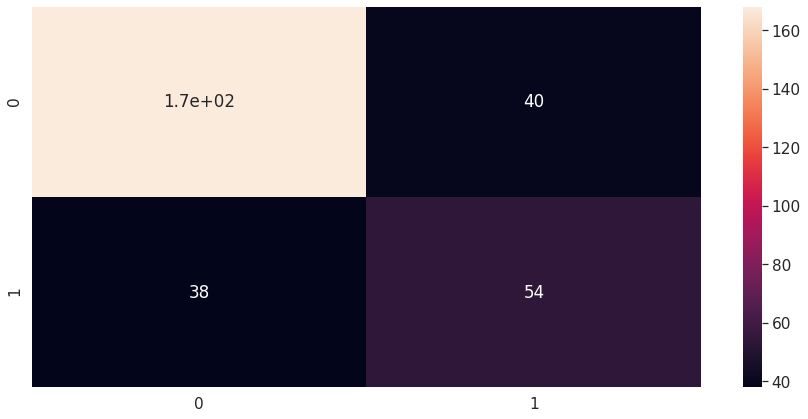

<Figure size 360x360 with 0 Axes>

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.figure(figsize=(5,5))
plt.show()

### Overall Accuracy Measures

In [0]:
result.head(11)

,Model,Accuracy,Precision,Recall,F1-Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Logistic Regression,78.6667,82.0513,89.7196,85.7143,-,-,-
1,Mulitple Linear Regression,-,-,-,-,33.3957,16.7362,0.409099
2,XGBoost Calssifier,76,78.5714,89.9038,83.8565,-,-,-
3,Random Forest Calssifier,76,77.6423,91.8269,84.141,-,-,-
4,SVM,74.6667,77.7311,88.9423,82.9596,-,-,-
5,KNN,74.6667,77.7311,88.9423,82.9596,-,-,-
6,NaiveBayes,74,81.5534,80.7692,81.1594,-,-,-


Latent Variables: 
1. People with Skilled jobs are highly possible to have a registered telephone.
2. Most of the households are likely to own a car, TV and radio. Most buy new cars.

## Conclusions


1. In all the confusion matrices the number of correct predictions are more(TP+TN),than incorrect predictions(FP+FN).
2. For PCA, Kmeans, GMM the above metrics don't apply. 
3. Features like 'Duration', 'age', 'Credit_amount' and ' checking_account' are most important features (- based on the plots in Random forest classifier) in the affecting the credit status.
4. 'age' and 'duration' are important features - based on the features importance plot in XGBoost Regression.
5. 'duration', 'credit_amount' and 'property' are the features affecting the credit status, basically

---

